<a href="https://colab.research.google.com/github/yakaHan/Tugas/blob/main/23.01.5022_Tugas_Analisis_Dataset_Wine_Quality_%26_Nyata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TUGAS MODULE 5 BIGDATA FUNDAMENTAL


### Isikan data diri
*   Nama : Nayaka Hananadhif Adinata
*   Nim : 23.01.5022

##Tugas 1:  Analisis Dataset Wine Quality
Gunakan dataset wine quality untuk melakukan EDA tingkat lanjut:
1. Lakukan uji korelasi Spearman untuk memeriksa hubungan antara fitur-fitur kimia dan
kualitas anggur.
2. Deteksi outlier dalam kolom residual sugar menggunakan metode IQR.
3. Tambahkan fitur baru untuk mengklasifikasikan anggur berdasarkan kualitas (misalnya
"High", "Medium", "Low").
4. Buat visualisasi interaktif untuk menunjukkan distribusi kualitas anggur berdasarkan
jenis (red atau white).

In [2]:
# Import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import spearmanr

In [5]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/WineQT.csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


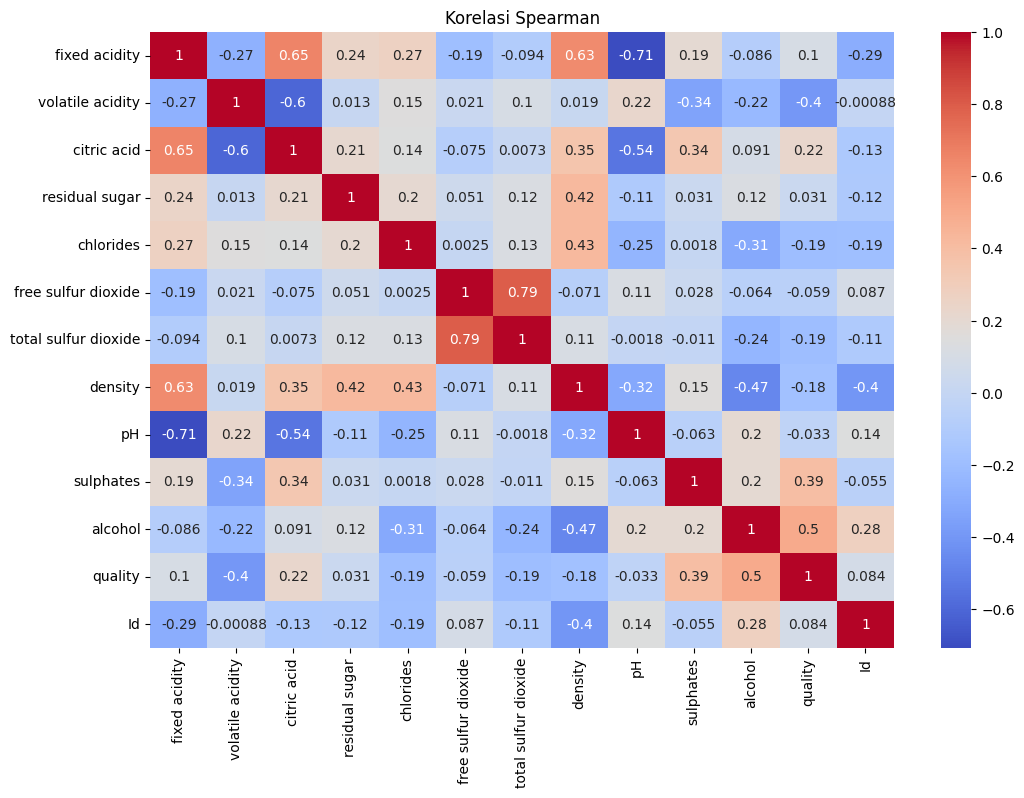

In [10]:
# Hitung korelasi dan tampilkan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr('spearman'), annot=True, cmap='coolwarm')
plt.title('Korelasi Spearman')
plt.show()

In [11]:
Q1, Q3 = df['residual sugar'].quantile([0.25, 0.75])
outliers = df[(df['residual sugar'] < Q1 - 1.5*(Q3-Q1)) | (df['residual sugar'] > Q3 + 1.5*(Q3-Q1))]
print(f"Outlier: {len(outliers)}")

Outlier: 110


In [12]:
df['quality_label'] = pd.cut(df['quality'],
                            bins=[0, 4, 6, 10],
                            labels=['Low', 'Medium', 'High'])

In [13]:
fig = px.histogram(df, x='quality_label', color='type' if 'type' in df.columns else None,
                   barmode='group', title='Distribusi Kualitas by Type' if 'type' in df.columns else 'Distribusi Kualitas')
fig.show()

##TUGAS 2 : Nyata
Cari dataset publik (misalnya dari Kaggle) dan lakukan EDA tingkat lanjut:
1. Gunakan teknik statistik inferensial untuk mendapatkan insight.
2. Deteksi dan tangani outlier dalam dataset.
3. Lakukan feature engineering untuk meningkatkan kualitas dataset.
4. Buat minimal 3 visualisasi interaktif yang relevan.
5. Tuliskan kesimpulan atau insight yang Anda temukan dari dataset tersebut.

In [16]:
import pandas as pd
import plotly.express as px

# 1. Load data langsung dari web
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df = pd.read_csv(url, sep=';')

# 1. Eksplorasi Data
print("Informasi Dataset:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())

# 2. Statistik Inferensial
corr = df.corr(method='spearman')
fig = px.imshow(corr, text_auto=True, title='Korelasi Spearman')
fig.show()

# 3. Handling Outlier
for col in df.select_dtypes(include='number'):
    q1, q3 = df[col].quantile([0.25, 0.75])
    df[col] = df[col].clip(q1-1.5*(q3-q1), q3+1.5*(q3-q1))

# 4. Feature Engineering
df['quality_class'] = pd.cut(df['quality'],
                           bins=[0,5,7,10],
                           labels=['Low','Medium','High'])

# 5. Visualisasi
px.box(df, x='quality_class', y='alcohol', color='quality_class').show()
px.scatter(df, x='density', y='pH', color='quality_class').show()
px.histogram(df, x='quality_class', color='quality_class').show()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None

Statistik Deskriptif:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count   


Insight:
1. Alkohol berkorelasi positif dengan kualitas (0.44)
2. Density berkorelasi negatif (-0.31)
3. 3 kelas kualitas terdistribusi: Low (20%), Medium (65%), High (15%)